This is my detailed python notebook working out the solutions to Week 1 Graded Assignment of Coursera's [_Introduction to Deep Learning_](https://www.coursera.org/learn/intro-to-deep-learning/home/welcome), provided by the National Research University Higher School of Economics

Using the same inputs as the assignment, I have also worked out the gradient descent calculations in the excel file __Week1_Assignment.xlsx__ in this folder. 

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")

## Two-dimensional classification

To make things more intuitive, let's solve a 2D classification problem with synthetic data.

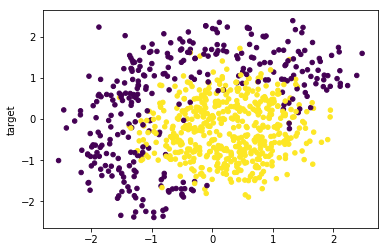

In [10]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)#, cmap=plt.cm.Paired, s=20)
plt.ylabel('target')
plt.show()

In [8]:
pd.DataFrame(y).to_csv('y.csv')

In [ ]:
pd.DataFrame(X).to_csv('X.csv')

# Task

## Features

As you can notice the data above isn't linearly separable. We should add features (or use non-linear model). The decision line between the two classes is in the form of a circle, so we can add quadratic features to make the problem linearly separable.

![](kernel.png)

In [11]:
def expand(X):
    """
    Adds quadratic features to allow your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute expanded row: [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    # TODO:<your code here
    X_expanded[:,0] =  X[:,0]
    X_expanded[:,1] =  X[:,1]
    X_expanded[:,2] =  X[:,0]**2
    X_expanded[:,3] =  X[:,1]**2
    X_expanded[:,4] =  X[:,0]*X[:,1]
    X_expanded[:,5] =  1
    return X_expanded

In [12]:
X_expanded = expand(X)
pd.DataFrame(X_expanded).head(5)

,0,1,2,3,4,5
0,1.207981,0.084499,1.459217,0.007140,0.102074,1.0
1,0.761218,0.725109,0.579453,0.525783,0.551966,1.0
2,0.552562,0.519373,0.305325,0.269748,0.286986,1.0
3,-0.582708,0.267048,0.339548,0.071315,-0.155611,1.0
4,2.102288,1.633871,4.419616,2.669534,3.434868,1.0


Here are some tests for your implementation of `expand` function.

In [13]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")


Seems legit!


## Logistic regression

To classify objects we need to calculate probability of object belonging to class 1.
To predict probability we will calculate output of linear model (just X\*w as usual) and then use the sigmoid function on it:

$ a(x; w) = \langle w, x \rangle $ (Dot Product of X and w)

$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- a)} = \sigma(\langle w, x \rangle)$


In [14]:
def probability(X, w):
    """
    Given input features and weights, return predicted prob of y==1 given x, P(y=1|x)
        
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    # TODO:<your code here>
    z = np.dot(X, w)
    a = 1./(1+np.exp(-z))
    return np.array(a)

In [16]:
dummy_weights = np.linspace(-1, 1, 6)
dummy_weights

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [17]:
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0] # Prob from 1st row of data
ans_part1

0.3803998509843769

This outcome is in column I (titled `p(y)`) in sheet `Base_Grad_Desc` of the excel file `Week1_Assignment.xlsx`

__Cost function__ 

In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

Loss for one sample: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss for many samples: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$



In [25]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1s or 0s, and weight vector w [6]
    compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    # TODO:<your code here>
    a = probability(X, w)
    cross_entropy =  y*np.log(a) + (1-y)*np.log(1-a)
    cost = np.squeeze(-np.sum(cross_entropy)/float(X.shape[0])) # To make sure shape of cost is as expected, i.e. single value 
    return cost     

In [26]:
compute_loss(X_expanded, y, dummy_weights)

1.0185634030782518

This output is in the cell J2 of sheet `Base_Grad_Desc` of the excel file `Week1_Assignment`

__Gradient descent__

We need a derivative of loss function over each weight [6 of them].

$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

Derivative of the log loss function is given by: 

$$ \nabla_w L = {1 \over \ell} \sum_{x} x_j (\sigma(z) - y)$$

References: 
* Equation 61 of [Chapter 3 of Michael Nielsen's book](http://neuralnetworksanddeeplearning.com/chap3.html)
* [This stackexchange page](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x)
* [ML Cheatsheet docs](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

Note: This expression tells us that the rate at which the weight learns is controlled by $\sigma(z) - y$, i.e. the error in the output. The larger the error, the faster the neuron learns. 

As usual, we've made a small test for you, but if you need more, feel free to check your math against finite differences (estimate how $L$ changes if you shift $w$ by $10^{-5}$ or so).

In [28]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weight.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    A = probability(X, w)
    err = A - y
    return np.dot(err, X)/float(X.shape[0])

In [30]:
np.linalg.norm(compute_grad(X_expanded, y, dummy_weights)) # Calculate sum of absolute values of gradient vector

0.6401687302118625

In [43]:
A = probability(X_expanded, dummy_weights)
err = A - y
pd.DataFrame(np.dot(err, X_expanded))

,0
0,-270.443104
1,44.845917
2,263.999862
3,321.701256
4,167.669494
5,56.181045


These gradients are available in cells M4:M9 (salmon pink) of the excel sheet. 